<a href="https://colab.research.google.com/github/OshidiWeerakulasuriya/User-interest-and-hotel-feature-identification-model/blob/main/UpdatedOverallSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref - Aspect Based Topic Modeling



In [ ]:
# Importing Libraries 
import numpy as np   
import pandas as pd  
  
# Import dataset 
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TripAdvisorData/CentaraCeysandsResortReviews.csv')

In [ ]:
dataset

,Date,Title,Review
0,Date of stay: October 2020,Weekend at Centara Ceysands,"Firstly, I have to say it was a sudden trip an..."
1,Date of stay: February 2020,What a place!,The long trip from the UK is definitely worth ...
2,Date of stay: October 2020,Excellent service and personal care,I was just wanted to spend with my family in m...
3,Date of stay: September 2020,Memorable stay...,We were at Centara Ceysands Bentota in Septemb...
4,Date of stay: August 2020,Anuradha,"hotel, garden rooms are very clean, specially ..."
...,...,...,...
2695,Date of stay: August 2014,Great Resort,It was my first time in a brand new resort whi...
2696,Date of stay: August 2014,can improve,check in and check out takes too long. Very fr...
2697,Date of stay: July 2014,Great approach,The new toll ways make Bentota relatively easy...
2698,Date of stay: July 2014,Relaxation with good food,It was a beautifully done hotel with an amazin...


In [ ]:
df = pd.DataFrame(dataset.Review)

In [ ]:
!pip install contractions
import contractions 

def expand_contractions(text):
    return contractions.fix(text)

df['Review'] = df['Review'].apply(expand_contractions)

In [ ]:
import re
import nltk

# Cleaning the tweets
# Creating a function called clean. removing hyperlink, #, RT, @mentions
def clean(x):
 # keep only words
  #regex_pat = re.compile(r'[^a-zA-Z\s]', flags=re.IGNORECASE)
  #x = x.str.replace(regex_pat, '', x)
  #x = re.compile(r'[^a-zA-Z\s]+', '', x)
  x = re.sub(r'^RT[\s]+', '', x)
  x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
  x = re.sub(r'#', '', x)
  x = re.sub(r'@', '', x) 
  return x

df['Review'] = df['Review'].apply(clean)

In [ ]:
def remove_numbers(text):
    """
    take string input and return a clean text without numbers. 
    Use regex to discard the numbers.
    """
    output = ''.join(c for c in text if not c.isdigit())
    return output

df['Review'] = df['Review'].apply(remove_numbers)

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def to_lower(text):
    """
    Converting text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
    """
    return ' '.join([w.lower() for w in word_tokenize(text)])

df['Review'] = df['Review'].apply(to_lower)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from string import punctuation # a string of various punctuation marks

def remove_punct(text):
    """
    take string input and clean string without punctuations.
    use regex to remove the punctuations.
    """
    return ''.join(c for c in text if c not in punctuation)

df['Review'] = df['Review'].apply(remove_punct)

In [ ]:
df

,Review
0,firstly i have to say it was a sudden trip an...
1,the long trip from the uk is definitely worth ...
2,i was just wanted to spend with my family in m...
3,we were at centara ceysands bentota in septemb...
4,hotel garden rooms are very clean specially ...
...,...
2695,it was my first time in a brand new resort whi...
2696,check in and check out takes too long very fr...
2697,the new toll ways make bentota relatively easy...
2698,it was a beautifully done hotel with an amazin...


In [ ]:
from textblob import TextBlob

polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['Review'].apply(polarity)
df['subjectivity'] = df['Review'].apply(subjectivity)

In [ ]:
df

,Review,polarity,subjectivity
0,firstly i have to say it was a sudden trip an...,0.157074,0.493070
1,the long trip from the uk is definitely worth ...,0.344250,0.622000
2,i was just wanted to spend with my family in m...,0.560833,0.820000
3,we were at centara ceysands bentota in septemb...,0.473114,0.575751
4,hotel garden rooms are very clean specially ...,0.385824,0.558168
...,...,...,...
2695,it was my first time in a brand new resort whi...,0.301031,0.590783
2696,check in and check out takes too long very fr...,0.077983,0.581818
2697,the new toll ways make bentota relatively easy...,0.115526,0.631485
2698,it was a beautifully done hotel with an amazin...,0.308558,0.538654


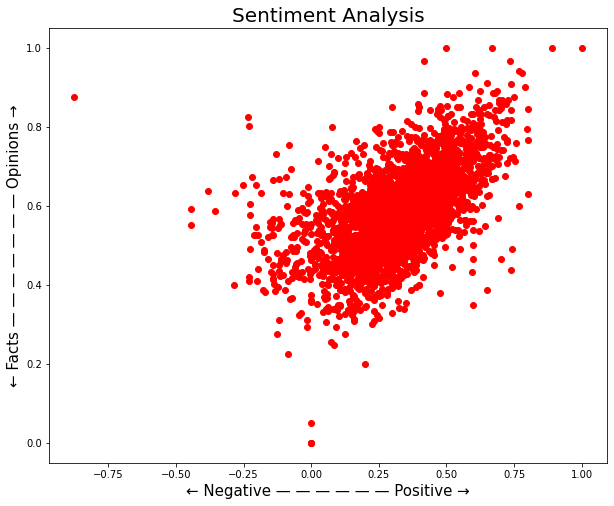

In [ ]:
# Let’s plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
for index, Tweets in enumerate(df.index):
 x = df.polarity.loc[Tweets]
 y = df.subjectivity.loc[Tweets]
 plt.scatter(x, y, color='Red')
 
 
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()

In [ ]:
# Creating function for calculating positive, negative and neutral
# More than 1 --> Positive, equal to 0 --> neutral and less than 0 --> Negative
def ratio(x):
 if x > 0:
  return 1
 elif x == 0:
  return 0
 else:
  return -1
df['analysis'] = df['polarity'].apply(ratio)

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
df.to_csv('Centaradata.csv')
!cp Centaradata.csv "drive/My Drive/Colab Notebooks/TripAdvisorData"

In [ ]:
#Download the file with sentiment analysis

from google.colab import files

df.to_csv('df.csv')
files.download('df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

data = pd.read_csv("/content/Centaradata.csv",encoding='UTF-8')

In [ ]:
#Eliminating punctuations

import string
import re

punctuations = string.punctuation 
punctuations_pattern = r"[{}]".format(punctuations)

data['Review'] = data.apply(lambda row: ' '.join(re.sub(punctuations_pattern,"",row["Review"]).split()), axis=1)


In [ ]:
#Sentence tokenization

import nltk
nltk.download('punkt')

sent_tokens = data.apply(lambda row: nltk.sent_tokenize(row["Review"]), axis=1)

sent_tokens


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [firstly i have to say it was a sudden trip an...
1       [the long trip from the uk is definitely worth...
2       [i was just wanted to spend with my family in ...
3       [we were at centara ceysands bentota in septem...
4       [hotel garden rooms are very clean specially r...
                              ...                        
2695    [it was my first time in a brand new resort wh...
2696    [check in and check out takes too long very fr...
2697    [the new toll ways make bentota relatively eas...
2698    [it was a beautifully done hotel with an amazi...
2699    [this is not a new hotel but one that is in th...
Length: 2700, dtype: object

In [ ]:
#Merging into a single document for data cleaning

import itertools

doc_complete = list(itertools.chain.from_iterable(list(sent_tokens)))

#doc_complete

In [ ]:
#Cleaning data(Removal of stop words and punctuations)

import string
from nltk.stem import WordNetLemmatizer 
import gensim
nltk.download('wordnet')
  
lemmatizer = WordNetLemmatizer()



stop = ['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours',
         'yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself',
         'they','the','them','their','theirs','themselves','what','which','who','whom','this','that',"that'll",'these',
         'those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing',
         'a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against',
         'between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off',
         'over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each',
         'few','more','most','other','some','such','only','own','same','so','than','too','very','s','t','can','will','just',
         'don',"don't",'should',"should've",'now','d','ll','m','o','re','ve','y','ain','aren']

def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    lemmatized = ''.join(lemmatizer.lemmatize(word) for word in stop_free)
    bigram_mod = bigrams(lemmatized)
    bigram = ''.join(bigram_mod[lemmatized])
    #print(bigram)
    return bigram

data_clean = [clean(doc).split() for doc in doc_complete]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
len(data_clean)

2700

In [ ]:
import itertools

words = list(itertools.chain.from_iterable(data_clean))

In [ ]:
nltk.download('averaged_perceptron_tagger')

pos = nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
import csv

# data=[('smith, bob',2),('carol',3),('ted',4),('alice',5)]

with open('POS.csv','w',encoding='utf-8') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['word','tag'])
    for row in POS:
        csv_out.writerow(row)

NameError: ignored

In [ ]:
from google.colab import files

POS = pd.DataFrame(pos)

POS.to_csv('POS.csv')
files.download('POS.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
POS = pd.read_csv('/content/POS.csv')

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [ ]:
POS[POS['tag']=='WRB']['word']

15153         whenever
37180            worst
39813           whilst
42365         whenever
45735         whenever
48073          welcome
51141         whenever
55787         whenever
59354         whenever
59978         whenever
75736             wifi
81527         whenever
91938         whenever
96322         whenever
104558        whenever
111854    waiterserver
115830      whatsoever
120148          wasana
141778        whenever
Name: word, dtype: object

In [ ]:
POS

,Unnamed: 0,word,tag
0,0,firstly,RB
1,1,say,VBP
2,2,sudden,JJ
3,3,trip,NN
4,4,booked,VBD
...,...,...,...
151152,151152,supervisor,NN
151153,151153,best,JJS
151154,151154,whole,JJ
151155,151155,hotel,NN


In [ ]:
pos = dict(pos)

In [ ]:
data_final=[]
sent = []

for sentence in data_clean:
    words=[]
    for term in sentence:
        #sent = sentence
        if pos[term] not in ['CC','CD','DT','EX','IN','JJS','MD','PRP','PRP$','RBS','RP','TO','UH','WDT','WP','WRB']:
            words.append(term)
    data_final.append(words)

In [ ]:
#Preparing Document-Term Matrix

# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_final)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_final]

In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word = dictionary, passes=50)

In [ ]:
# Print the Keyword in the 10 topics
print(ldamodel.print_topics())
#doc_lda = lda_model[corpus]

[(0, '0.029*"staff" + 0.020*"hotel" + 0.018*"food" + 0.017*"great" + 0.014*"friendly" + 0.011*"centara" + 0.011*"stay" + 0.011*"pool" + 0.009*"helpful" + 0.009*"amazing"'), (1, '0.049*"not" + 0.021*"hotel" + 0.011*"room" + 0.011*"staff" + 0.010*"service" + 0.007*"rooms" + 0.007*"get" + 0.005*"however" + 0.005*"booked" + 0.005*"check"'), (2, '0.037*"hotel" + 0.024*"beach" + 0.024*"good" + 0.020*"pool" + 0.018*"food" + 0.016*"river" + 0.014*"nice" + 0.013*"rooms" + 0.011*"great" + 0.010*"staff"'), (3, '0.005*"tuk" + 0.004*"massage" + 0.004*"visit" + 0.003*"bbq" + 0.003*"treatments" + 0.003*"missed" + 0.003*"n" + 0.003*"big" + 0.003*"yards" + 0.003*"live"'), (4, '0.010*"sri" + 0.009*"resort" + 0.008*"ceysands" + 0.008*"lanka" + 0.007*"centara" + 0.006*"bentota" + 0.005*"–" + 0.005*"greeted" + 0.004*"trip" + 0.004*"staff"'), (5, '0.033*"room" + 0.019*"hotel" + 0.017*"not" + 0.017*"pool" + 0.010*"river" + 0.009*"view" + 0.009*"staff" + 0.009*"boat" + 0.007*"rooms" + 0.006*"lovely"')]


In [ ]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=data_final, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.313331461929606

Coherence Score:  0.36812733981679374


In [ ]:
# Visualize the topics
#to examine the produced topics and the associated keywords
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

     |████████████████████████████████| 1.6MB 4.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=0a1b843bfd735b2e451deee8947dd3100775eb374cbe2a7e454df888799e7f64
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.141444  0.093838       1        1  30.183839
5      0.123920 -0.031511       2        1  29.923873
2      0.157523  0.074934       3        1  22.625874
1      0.056668 -0.197031       4        1  13.505013
4     -0.198467  0.082234       5        1   2.228895
3     -0.281088 -0.022463       6        1   1.532505, topic_info=               Term         Freq        Total Category  logprob  loglift
161             not  2163.000000  2163.000000  Default  30.0000  30.0000
71            beach  1202.000000  1202.000000  Default  29.0000  29.0000
268             sri   654.000000   654.000000  Default  28.0000  28.0000
46             room  2114.000000  2114.000000  Default  27.0000  27.0000
113        ceysands   392.000000   392.000000  Default  26.0000  26.0000
77             good  1350.000000  1350.000000  Default  25.0000  25.0000
310          resort   870.000000   870.000000  Default  24.0000  24.0000
45            river  1103.000000  1103.000000  Default  23.0000  23.0000
112         centara   778.000000   778.000000  Default  22.0000  22.0000
255           lanka   501.000000   501.000000  Default  21.0000  21.0000
22         friendly   869.000000   869.000000  Default  20.0000  20.0000
40             pool  1794.000000  1794.000000  Default  19.0000  19.0000
129         bentota   400.000000   400.000000  Default  18.0000  18.0000
26            hotel  3205.000000  3205.000000  Default  17.0000  17.0000
4              boat   731.000000   731.000000  Default  16.0000  16.0000
78            great  1327.000000  1327.000000  Default  15.0000  15.0000
51             side   483.000000   483.000000  Default  14.0000  14.0000
21             food  1604.000000  1604.000000  Default  13.0000  13.0000
167         special   323.000000   323.000000  Default  12.0000  12.0000
54            staff  2166.000000  2166.000000  Default  11.0000  11.0000
137           place   474.000000   474.000000  Default  10.0000  10.0000
192           visit   237.000000   237.000000  Default   9.0000   9.0000
171           water   473.000000   473.000000  Default   8.0000   8.0000
190          thanks   169.000000   169.000000  Default   7.0000   7.0000
25          helpful   541.000000   541.000000  Default   6.0000   6.0000
49              sea   478.000000   478.000000  Default   5.0000   5.0000
237          always   428.000000   428.000000  Default   4.0000   4.0000
60             view   618.000000   618.000000  Default   3.0000   3.0000
119         service   814.000000   814.000000  Default   2.0000   2.0000
353           ocean   496.000000   496.000000  Default   1.0000   1.0000
189           thank   206.220101   206.882686   Topic1  -5.3234   1.1947
1249      memorable    52.781862    53.444319   Topic1  -6.6861   1.1854
507          sugath    51.710638    52.373683   Topic1  -6.7066   1.1851
864        aerobics    49.216180    49.878421   Topic1  -6.7561   1.1845
2882           cake    46.912678    47.575358   Topic1  -6.8040   1.1838
823           truly    44.180952    44.847577   Topic1  -6.8640   1.1829
568       executive    36.022822    36.684005   Topic1  -7.0682   1.1797
2071          nelka    32.019075    32.681573   Topic1  -7.1860   1.1774
5659          jeewa    25.744722    26.407536   Topic1  -7.4041   1.1724
1943        roshini    25.534518    26.196343   Topic1  -7.4123   1.1723
4283      chinthaka    24.900890    25.561926   Topic1  -7.4374   1.1717
541           udara    24.900403    25.561734   Topic1  -7.4374   1.1717
831           nuwan    21.537883    22.200420   Topic1  -7.5825   1.1676
890             art    24.781054    25.549112   Topic1  -7.4422   1.1673
2289            kid    21.334767    22.000850   Topic1  -7.5920   1.1671
619          tastes    19.240046    19.903702   Topic1  -7.6953   1.1640
893    entertaining    17.145219    17.811871   Topic1  -7.8106   1.1597
8757          mohan  

In [ ]:
#data_final

In [ ]:
from google.colab import files

dfinal = pd.DataFrame(data_final)

dfinal.to_csv('dfinal.csv')
files.download('dfinal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
corpus = []
for doc in data_final:
    document = ' '.join(doc)
    corpus.append(document)
    document=[]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [ ]:
X.shape

(2700, 9831)

In [ ]:
data

,Unnamed: 0,Review,polarity,subjectivity,analysis
0,0,firstly i have to say it was a sudden trip and...,0.157074,0.493070,1
1,1,the long trip from the uk is definitely worth ...,0.344250,0.622000,1
2,2,i was just wanted to spend with my family in m...,0.560833,0.820000,1
3,3,we were at centara ceysands bentota in septemb...,0.473114,0.575751,1
4,4,hotel garden rooms are very clean specially re...,0.385824,0.558168,1
...,...,...,...,...,...
2695,2695,it was my first time in a brand new resort whi...,0.301031,0.590783,1
2696,2696,check in and check out takes too long very fri...,0.077983,0.581818,1
2697,2697,the new toll ways make bentota relatively easy...,0.115526,0.631485,1
2698,2698,it was a beautifully done hotel with an amazin...,0.308558,0.538654,1


In [ ]:
len(data_final)

2700

In [ ]:
data_final = pd.read_csv('/dfinal.csv')

not necessary code

In [ ]:
data_final

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91
0,0,firstly,say,sudden,trip,booked,hotel,morning,arrival,day,reservation,staff,helpful,friendly,offered,discounted,price,😃,need,park,vehicle,land,side,take,small,boat,ride,hotel,centered,river,side,sea,certain,restrictions,die,covid,pandemic,hotel,staff,arranged,...,felt,bit,aged,room,comfortable,well,arranged,swimming,pool,large,clean,shallow,part,children,well,little,daughter,enjoyed,pool,much,😍,food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,long,trip,uk,definitely,worth,location,amazing,literally,steps,away,amazing,beach,family,teenagers,pool,area,great,lots,loungers,massive,pool,swim,bar,middle,complimentary,wifi,also,massive,keeps,kids,occupied,allows,send,pics,home,make,rellies,jealous,🙂,...,make,holiday,better,highly,recommended,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,wanted,spend,family,50th,birthday,selected,centara,ceysands,affordable,mr,thanuj,gunathilka,staff,give,tremendous,service,food,facilities,good,recommended,hotel,lovely,weekend,lovely,beach,vinoba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,centara,ceysands,bentota,september,awesome,go,boat,ferry,hotel,good,experience,hotel,beautiful,good,place,comfortable,stay,rooms,big,well,equipped,pool,clean,big,food,tasty,staff,really,helpful,specially,staff,main,restaurant,enjoyed,lot,good,time,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,hotel,garden,rooms,clean,specially,restaurant,clean,indoor,door,areas,good,view,food,choices,not,expected,according,star,category,sayonly,action,stations,main,restaurant,sometimes,corona,pandemic,situation,arrival,hotel,departure,special,boat,ride,pool,good,large,beach,water,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,2695,first,time,brand,new,resort,opened,months,ago,really,liked,enter,hotel,bentota,river,boat,fantastic,view,hotel,boat,food,nice,especially,deserts,service,staff,restaurant,excellent,room,service,hand,not,maybe,staff,less,work,slow,saw,make,bed,...,hotel,families,especially,children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2696,2696,check,check,takes,long,friendly,staff,good,location,view,beach,new,hotel,dining,chairs,already,dirty,breakfast,areacafe,swimming,pool,group,wore,full,cloth,made,unhealthy,others,not,use,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2697,2697,new,toll,ways,make,bentota,relatively,easy,access,connecting,road,still,construction,spot,centara,ceysands,realise,different,experience,ride,speedboat,ferry,larger,parties,river,hotel,beach,bit,dangerous,swimming,good,pool,swimming,beach,great,walking,listening,surf,night,outdoor,...,really,cold,beer,bar,manager,went,special,trouble,meet,needs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na